## Import Libraries

In [1]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Read the Data

In [2]:
df = pd.read_csv('../data/BTC-USD.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,51897585191
2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,92052420332
2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824
2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,63695521388
2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,54506565949


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

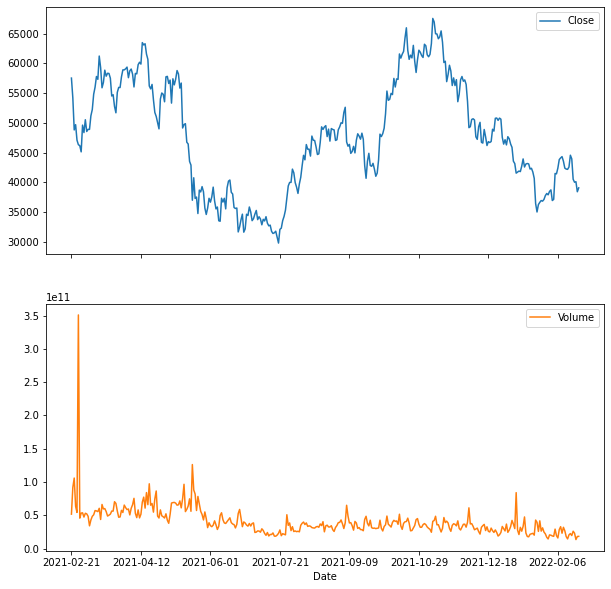

In [3]:
df[['Close', 'Volume']].plot(by=df.index, subplots=True, figsize=(10,10))

In [4]:
df['Volume_Adjusted'] = df['Volume'] / 10**6

Text(0.5, 0, 'Closing Price and Volume Distributions')

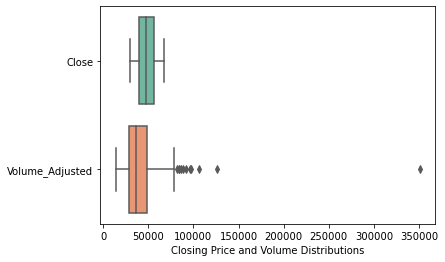

In [5]:
ax = sns.boxplot(data=df[['Close', 'Volume_Adjusted']], orient="h", palette="Set2")
ax.set_xlabel('Closing Price and Volume Distributions')

## Feature Engineering

In [6]:
df['NormalizedPrice'] = (df['Close'] - df['Close'].mean())/df['Close'].std()
df['NormalizedVolume'] = (df['Volume'] - df['Volume'].mean())/df['Volume'].std()

df['VolumexPrice'] = df['NormalizedVolume'] * df['NormalizedPrice']

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_Adjusted,NormalizedPrice,NormalizedVolume,VolumexPrice
Date,,,,,,,,,,
2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,51897585191,51897.585191,1.059694,0.470759,0.498860
2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,92052420332,92052.420332,0.698596,2.201704,1.538102
2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824,106102.492824,0.115348,2.807357,0.323822
2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,63695521388,63695.521388,0.210796,0.979329,0.206438
2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,54506565949,54506.565949,-0.072164,0.583223,-0.042088


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

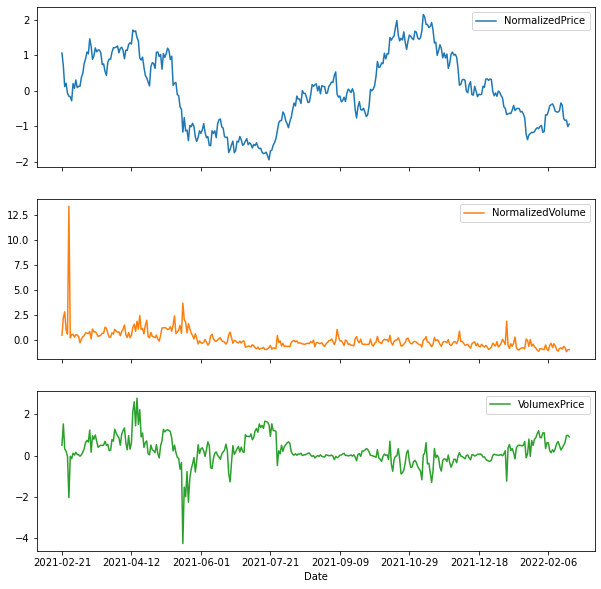

In [8]:
df[['NormalizedPrice', 'NormalizedVolume', 'VolumexPrice']].plot(by=df.index, subplots=True, figsize=(10,10))

## Isolation Forest

In [9]:
random_state = np.random.RandomState(42)

In [10]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=random_state)
model.fit(df[['VolumexPrice']])
print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FC90BA96840, 'verbose': 0, 'warm_start': False}


In [11]:
df['anomaly_scores']=model.predict(df[['VolumexPrice']])

In [12]:
df[df['anomaly_scores']==-1].index.values

array(['2021-02-22', '2021-02-26', '2021-03-31', '2021-04-07',
       '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
       '2021-04-17', '2021-04-18', '2021-05-05', '2021-05-08',
       '2021-05-17', '2021-05-19', '2021-05-20', '2021-05-21',
       '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
       '2021-05-28', '2021-06-08', '2021-06-09', '2021-06-21',
       '2021-06-22', '2021-07-11', '2021-07-13', '2021-07-14',
       '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
       '2021-07-19', '2021-07-20', '2021-07-22', '2021-07-26',
       '2021-10-16', '2021-10-17', '2021-10-23', '2021-10-24',
       '2021-10-25', '2021-10-30', '2021-10-31', '2021-11-04',
       '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-13',
       '2021-11-14', '2021-11-15', '2021-11-20', '2021-11-21',
       '2021-11-28', '2021-11-29', '2022-01-07'], dtype=object)